<a href="https://colab.research.google.com/github/uzairazmat/Data-Science-Internship-with-British-Airways/blob/main/Task01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [29]:
!pip uninstall -y scipy gensim
!pip install scipy==1.10.1 gensim==4.3.2 numpy==1.23.5 --force-reinstall


Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: gensim 4.3.2
Uninstalling gensim-4.3.2:
  Successfully uninstalled gensim-4.3.2
  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: wra

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
import requests
from bs4 import BeautifulSoup

# STEP 1: Base URL and loop setup
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 390
pagesize = 10
reviews = []

# Loop through pages
for page in range(1, pages + 1):
    # print(f"Current Page Number is {page}")
    url = f"{base_url}/page/{page}/?sortby=post_date%3ADesc&pagesize={pagesize}"

    # Send request
    response = requests.get(url)
    content = response.content

    # Step 3: Parse content
    parsed_content = BeautifulSoup(content, "html.parser")

    # Extract review texts
    for content in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(content.get_text(strip=True))  # strip=True removes leading/trailing whitespace


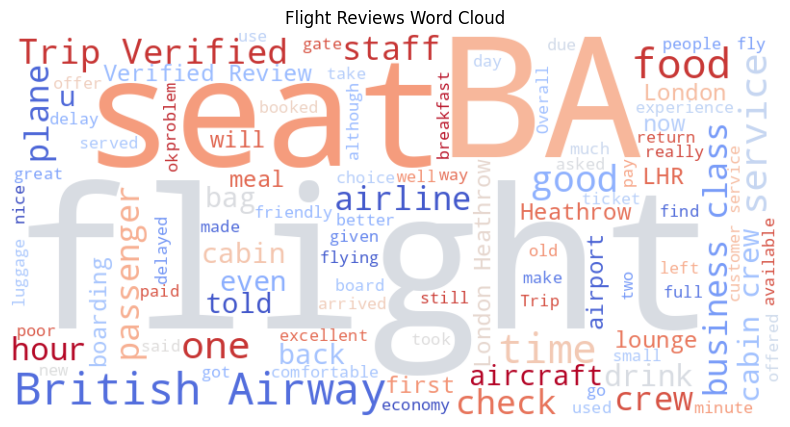

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()
all_reviews = " ".join(df["reviews"])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='coolwarm').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Flight Reviews Word Cloud")
plt.show()

In [4]:
df.to_csv("BA_reviews.csv")

In [2]:
df = pd.read_csv("BA_reviews.csv" ,header = None)

# Data Preprocessing

In [3]:
df.head()


,0,1
0,NaN,reviews
1,0.0,✅Trip Verified| Could not book online the ni...
2,1.0,✅Trip Verified| Having had some rough experien...
3,2.0,✅Trip Verified| This comfortable flight was ...
4,3.0,✅Trip Verified| Punta Cana Terminal B check ...


In [4]:
df.tail()

,0,1
3896,3895.0,LGW-MRU-LGW in business. Outbound flight good ...
3897,3896.0,LHR-FRA-LCY May 2014. LHR-FRA on a 767 row 18....
3898,3897.0,Rating : 10/10 Cabin Flown Economy Value for M...
3899,3898.0,2/5/2014 BRU-LHR-JFK. Short flight in business...
3900,3899.0,08/5/2014 JFK-LHR-BRU. After the perfect outbo...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901 entries, 0 to 3900
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3900 non-null   float64
 1   1       3901 non-null   object 
dtypes: float64(1), object(1)
memory usage: 61.1+ KB


In [6]:
col = ["Review_Number" , "Review_Text"]
df.columns = col

In [7]:
df.dropna(inplace = True)

In [8]:
df = df.set_index("Review_Number")

In [9]:
df.head()

,Review_Text
Review_Number,
0.0,✅Trip Verified| Could not book online the ni...
1.0,✅Trip Verified| Having had some rough experien...
2.0,✅Trip Verified| This comfortable flight was ...
3.0,✅Trip Verified| Punta Cana Terminal B check ...
4.0,✅Trip Verified| The employee at Venice Airpo...


In [10]:
df.index  = df.index.astype(int)

In [11]:
df["Review_Text"] = df["Review_Text"].str.replace(r"^\s*✅\s*Trip Verified\s*\|\s*", " ", regex=True)
df["Review_Text"] = df["Review_Text"].str.lstrip('|\xa0\xa0 ')
df["Review_Text"]

,Review_Text
Review_Number,
0,Could not book online the night before because...
1,Having had some rough experiences with BA in r...
2,This comfortable flight was BA at its best. Ex...
3,Punta Cana Terminal B check in was straightfor...
4,The employee at Venice Airport checkin was ver...
...,...
3895,LGW-MRU-LGW in business. Outbound flight good ...
3896,LHR-FRA-LCY May 2014. LHR-FRA on a 767 row 18....
3897,Rating : 10/10 Cabin Flown Economy Value for M...


In [12]:
# converting all text into lower case
df["Review_Text"] = df["Review_Text"].str.lower()
df["Review_Text"]

,Review_Text
Review_Number,
0,could not book online the night before because...
1,having had some rough experiences with ba in r...
2,this comfortable flight was ba at its best. ex...
3,punta cana terminal b check in was straightfor...
4,the employee at venice airport checkin was ver...
...,...
3895,lgw-mru-lgw in business. outbound flight good ...
3896,lhr-fra-lcy may 2014. lhr-fra on a 767 row 18....
3897,rating : 10/10 cabin flown economy value for m...


In [13]:
# drop na
df.dropna(inplace = True)
df

,Review_Text
Review_Number,
0,could not book online the night before because...
1,having had some rough experiences with ba in r...
2,this comfortable flight was ba at its best. ex...
3,punta cana terminal b check in was straightfor...
4,the employee at venice airport checkin was ver...
...,...
3895,lgw-mru-lgw in business. outbound flight good ...
3896,lhr-fra-lcy may 2014. lhr-fra on a 767 row 18....
3897,rating : 10/10 cabin flown economy value for m...


In [14]:
df.head()

,Review_Text
Review_Number,
0,could not book online the night before because...
1,having had some rough experiences with ba in r...
2,this comfortable flight was ba at its best. ex...
3,punta cana terminal b check in was straightfor...
4,the employee at venice airport checkin was ver...


In [15]:
!pip install Gensim
from gensim.parsing.preprocessing import remove_stopwords

# Apply Gensim's stopword removal — preserves spacing
df['Review_Text'] = df['Review_Text'].apply(lambda x: remove_stopwords(x))
df['Review_Text']


,Review_Text
Review_Number,
0,book online night down. arrived early airport ...
1,"having rough experiences ba recent years, look..."
2,comfortable flight ba best. excellent start ch...
3,punta cana terminal b check straightforward se...
4,employee venice airport checkin rude us. mista...
...,...
3895,lgw-mru-lgw business. outbound flight good att...
3896,lhr-fra-lcy 2014. lhr-fra 767 row 18. checked-...
3897,rating : 10/10 cabin flown economy value money...


In [16]:
# removing special char

import re

df["Review_Text"] = df["Review_Text"].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', ' ', x))

df["Review_Text"]

,Review_Text
Review_Number,
0,book online night down arrived early airport ...
1,having rough experiences ba recent years look...
2,comfortable flight ba best excellent start ch...
3,punta cana terminal b check straightforward se...
4,employee venice airport checkin rude us mista...
...,...
3895,lgw mru lgw business outbound flight good att...
3896,lhr fra lcy 2014 lhr fra 767 row 18 checked ...
3897,rating 10 10 cabin flown economy value money...


# Performing EDA

In [17]:
# number of reviews
df["Review_Text"].info()

<class 'pandas.core.series.Series'>
Index: 3900 entries, 0 to 3899
Series name: Review_Text
Non-Null Count  Dtype 
--------------  ----- 
3900 non-null   object
dtypes: object(1)
memory usage: 60.9+ KB


In [18]:
# Calculate min , max , avg len
df["review_lengths"] = df["Review_Text"].apply(lambda x: len(x.split()))

max_length = df["review_lengths"].max()
min_length = df["review_lengths"].min()
avg_length = df["review_lengths"].mean()

print("Max length:", max_length)
print("Min length:", min_length)
print("Average length:", avg_length)

Max length: 361
Min length: 9
Average length: 81.25205128205128


In [19]:
df.sort_values(by = "review_lengths" , ascending = False) #sorting on the base of len

,Review_Text,review_lengths
Review_Number,,
1346,toronto lhr lgw toronto return wt finally b...,361
2303,toronto lisbon connecting london outward sto...,357
1990,verified review toronto berlin london miles ...,351
1649,verified review shanghai tampa heathrow gatw...,326
482,probably worst business class experience i ve ...,318
...,...,...
3022,crew enthusiastic helpful service fast served...,12
11,service rude attitude me food poorly service...,12
719,1h queuing check in desk told booked seat ava...,12


In [20]:
# most 50 common words
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

freq_words = []

for review in df["Review_Text"]:
    for word in review.split():
        freq_words.append(word)

freq_words = Counter(freq_words).most_common(50)
freq_words

most_common_words = [word for word , freq in freq_words]
most_common_words

['flight',
 'ba',
 'service',
 't',
 'seat',
 'food',
 'london',
 'british',
 'crew',
 'airways',
 'time',
 'seats',
 'good',
 'cabin',
 'class',
 'business',
 'staff',
 'heathrow',
 's',
 'economy',
 'check',
 'flights',
 'return',
 'hours',
 'club',
 'lhr',
 'airline',
 'plane',
 'boarding',
 'passengers',
 'verified',
 'lounge',
 'experience',
 'it',
 'new',
 'fly',
 'aircraft',
 'i',
 '2',
 'meal',
 'hour',
 'told',
 'review',
 'like',
 'customer',
 'long',
 '3',
 'airlines',
 'in',
 'airport']

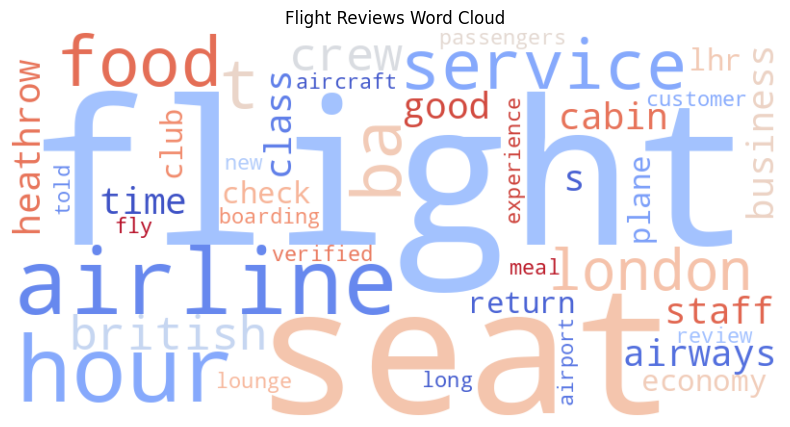

In [30]:
all_reviews = " ".join(most_common_words)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='coolwarm').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Flight Reviews Word Cloud")
plt.show()

In [21]:
# Import necessary libraries
import pandas as pd
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import re


# Step 1: Tokenization (convert reviews to lowercase and split into words)
df['Tokenized_Reviews'] = df['Review_Text'].apply(lambda x: x.lower().split())


# Step 3: Create the Bag of Words (BoW) model
# BoW is a mapping of words to their unique ids
dictionary = Dictionary(df['Tokenized_Reviews'])

# Create the corpus (list of Bag-of-Words representations for each review)
corpus = [dictionary.doc2bow(review) for review in df['Tokenized_Reviews']]

# Step 4: Train the LDA (Latent Dirichlet Allocation) model
# LDA will find topics within the reviews, we will specify the number of topics we want
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Step 5: Print the Top 10 Words for Each Topic
# This will give us a sense of what each topic is about
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

# Step 6: Assign the Most Dominant Topic to Each Review
# For each review, we calculate the topic probabilities and assign the most probable topic
df['Dominant_Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in corpus]

# Step 7: Count How Many Reviews Belong to Each Topic
# This will give us the number of reviews assigned to each topic
print("\nTopic distribution across reviews:")
print(df['Dominant_Topic'].value_counts())

# Step 8: Visualizing Topics (Optional)
# You can visualize topics using pyLDAvis if you want an interactive topic distribution plot
# import pyLDAvis.gensim
# pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)


(0, '0.019*"seat" + 0.019*"class" + 0.017*"business" + 0.015*"seats" + 0.013*"flight" + 0.012*"ba" + 0.012*"british" + 0.012*"airways" + 0.010*"economy" + 0.009*"t"')
(1, '0.015*"ba" + 0.014*"flight" + 0.012*"food" + 0.011*"cabin" + 0.010*"t" + 0.010*"service" + 0.010*"crew" + 0.008*"seat" + 0.008*"economy" + 0.008*"seats"')
(2, '0.022*"ba" + 0.020*"flight" + 0.012*"british" + 0.012*"airways" + 0.010*"customer" + 0.010*"t" + 0.009*"service" + 0.009*"told" + 0.008*"london" + 0.006*"airline"')
(3, '0.019*"flight" + 0.017*"good" + 0.014*"ba" + 0.014*"crew" + 0.013*"service" + 0.012*"lounge" + 0.011*"food" + 0.011*"cabin" + 0.011*"club" + 0.010*"time"')
(4, '0.041*"flight" + 0.014*"ba" + 0.011*"time" + 0.010*"staff" + 0.008*"hours" + 0.008*"t" + 0.008*"heathrow" + 0.008*"check" + 0.008*"london" + 0.007*"minutes"')

Topic distribution across reviews:
Dominant_Topic
3    1122
1     826
4     691
2     639
0     622
Name: count, dtype: int64


In [22]:
# Assign the most dominant topic to each review
df['Dominant_Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in corpus]


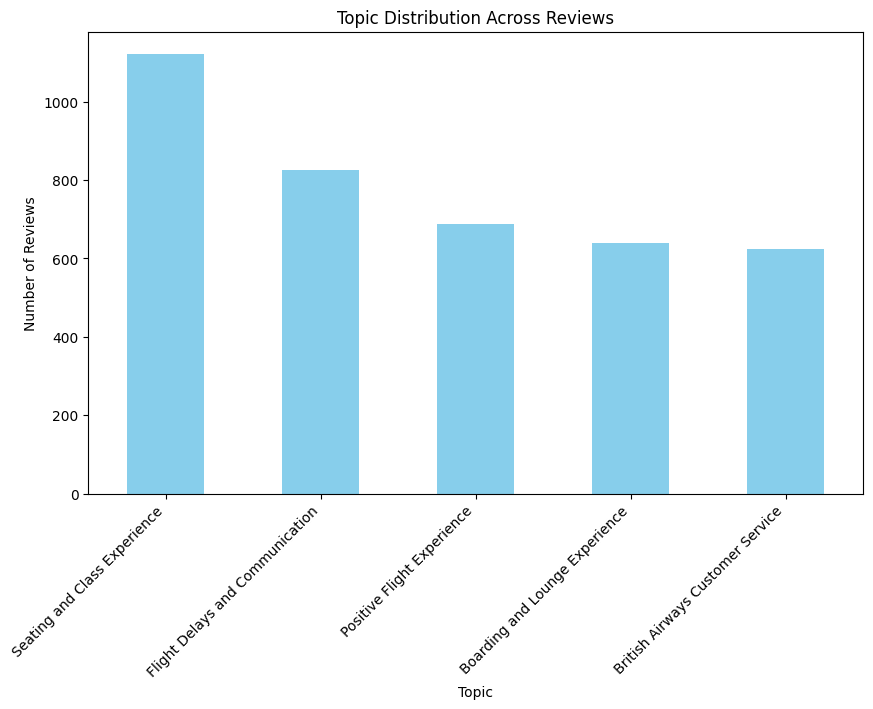

In [23]:
import matplotlib.pyplot as plt

# 1. Define a dictionary to map topic IDs to their corresponding labels
topic_labels = {
    0: "British Airways Customer Service",
    1: "Flight Delays and Communication",
    2: "Boarding and Lounge Experience",
    3: "Seating and Class Experience",
    4: "Positive Flight Experience"
}

# 2. Map the 'Dominant_Topic' values to the corresponding labels
df['Dominant_Topic_Label'] = df['Dominant_Topic'].map(topic_labels)

# 3. Count the frequency of each dominant topic (with labels)
topic_counts = df['Dominant_Topic_Label'].value_counts()

# 4. Plot the distribution of topics with labeled x-axis
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='skyblue')

# 5. Update plot title, labels, and x-ticks
plt.title('Topic Distribution Across Reviews')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha="right")  # Rotate the x-axis labels to avoid overlap
plt.show()



In [24]:
pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.0 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.6.4 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1

In [25]:
import pyLDAvis.gensim

# Visualizing the LDA model
pyLDAvis.enable_notebook()  # Use this in Jupyter Notebooks
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


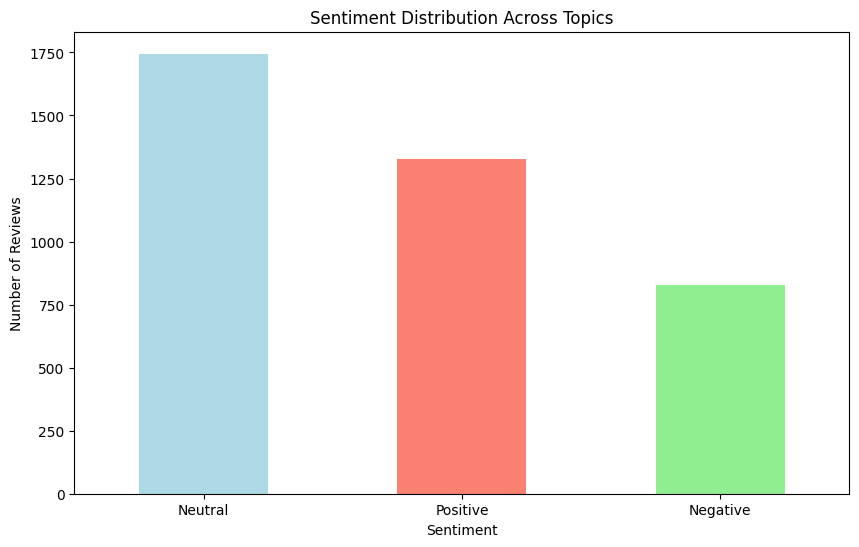

In [26]:
import matplotlib.pyplot as plt

# Manually assign sentiment labels to topics (positive, negative, neutral)
topic_sentiments = {
    0: 'Neutral',   # Based on words like 'service', 'customer'
    1: 'Negative',  # Based on words like 'hours', 'delayed', 'staff'
    2: 'Positive',  # Based on words like 'good', 'crew', 'lounge'
    3: 'Neutral',   # Based on words like 'seats', 'food', 'economy'
    4: 'Positive'   # Based on words like 'good', 'crew', 'service'
}

# Map the sentiment labels to the dominant topics in the DataFrame
df['Topic_Sentiment'] = df['Dominant_Topic'].map(topic_sentiments)

# Count the number of reviews per sentiment
sentiment_counts = df['Topic_Sentiment'].value_counts()

# Plot the sentiment distribution across reviews
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['lightblue', 'salmon', 'lightgreen'])
plt.title('Sentiment Distribution Across Topics')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


In [27]:
df.head()

,Review_Text,review_lengths,Tokenized_Reviews,Dominant_Topic,Dominant_Topic_Label,Topic_Sentiment
Review_Number,,,,,,
0,book online night down arrived early airport ...,30,"[book, online, night, down, arrived, early, ai...",2,Boarding and Lounge Experience,Positive
1,having rough experiences ba recent years look...,31,"[having, rough, experiences, ba, recent, years...",1,Flight Delays and Communication,Negative
2,comfortable flight ba best excellent start ch...,72,"[comfortable, flight, ba, best, excellent, sta...",3,Seating and Class Experience,Neutral
3,punta cana terminal b check straightforward se...,165,"[punta, cana, terminal, b, check, straightforw...",3,Seating and Class Experience,Neutral
4,employee venice airport checkin rude us mista...,43,"[employee, venice, airport, checkin, rude, us,...",2,Boarding and Lounge Experience,Positive


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 0 to 3899
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Review_Text           3900 non-null   object
 1   review_lengths        3900 non-null   int64 
 2   Tokenized_Reviews     3900 non-null   object
 3   Dominant_Topic        3900 non-null   int64 
 4   Dominant_Topic_Label  3900 non-null   object
 5   Topic_Sentiment       3900 non-null   object
dtypes: int64(2), object(4)
memory usage: 213.3+ KB


In [29]:
df["Topic_Sentiment"].value_counts()

,count
Topic_Sentiment,
Neutral,1745
Positive,1329
Negative,826
